In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#genetic algorithms
#your own methods for ciphering techniques and how its is usefull
#how to make deciphering difficult
#for midterm
#2 thoerry questions
#morkov derivations
#problem solving wiht logic pseaudocode
#

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import string
import random
import re
import requests
import os
import textwrap

Creates a substitution cipher by randomly mapping lowercase letters to other lowercase letters.
letters1, letters2: Lists representing the alphabet.

true_mapping: A dictionary storing the substitution mapping (e.g., 'a' might map to 'x').
random.shuffle(letters2): Shuffles the order of letters2 to create a random mapping.

In [ ]:
### create substitution cipher

# one will act as the key, other as the value
letters1 = list(string.ascii_lowercase)
letters2 = list(string.ascii_lowercase)

true_mapping = {}

# shuffle second set of letters
random.shuffle(letters2)

# populate map
for k, v in zip(letters1, letters2):
  true_mapping[k] = v

Defines a language model using a Markov matrix to estimate the probability of word sequences.

M: The Markov matrix, where M[i, j] represents the probability of transitioning from letter i to letter j.

pi: The initial state distribution, representing the probabilities of starting with each letter.

Functions: update_transition, update_pi, get_word_prob, get_sequence_prob are defined to update and calculate probabilities based on the model.

In [ ]:
### the language model

# initialize Markov matrix
M = np.ones((26, 26))

# initial state distribution
pi = np.zeros(26)

# a function to update the Markov matrix
def update_transition(ch1, ch2):
  # ord('a') = 97, ord('b') = 98, ...
  i = ord(ch1) - 97
  j = ord(ch2) - 97
  M[i,j] += 1

# a function to update the initial state distribution
def update_pi(ch):
  i = ord(ch) - 97
  pi[i] += 1

# get the log-probability of a word / token
def get_word_prob(word):
  # print("word:", word)
  i = ord(word[0]) - 97
  logp = np.log(pi[i])

  for ch in word[1:]:
    j = ord(ch) - 97
    logp += np.log(M[i, j]) # update prob
    i = j # update j

  return logp

# get the probability of a sequence of words
def get_sequence_prob(words):
  # if input is a string, split into an array of tokens
  if type(words) == str:
    words = words.split()

  logp = 0
  for word in words:
    logp += get_word_prob(word)
  return logp

Trains the language model using the text from "Moby Dick."

regex: A regular expression to identify non-alphabetic characters.

Loop: Reads the "Moby Dick" file line by line, processes the text, and updates the Markov matrix (M) and initial state distribution (pi) based on the observed letter transitions.

Normalization: Normalizes the probabilities in pi and M to ensure they sum to 1.

In [ ]:
# for replacing non-alpha characters
regex = re.compile('[^a-zA-Z]')

# load in words
for line in open('/content/drive/MyDrive/Colab Notebooks2/NLP/lab7/moby_dick.txt'):
  line = line.rstrip()

  # there are blank lines in the file
  if line:
    line = regex.sub(' ', line) # replace all non-alpha characters with space

    # split the tokens in the line and lowercase
    tokens = line.lower().split()

    for token in tokens:
      # update the model

      # first letter
      ch0 = token[0]
      update_pi(ch0)

      # other letters
      for ch1 in token[1:]:
        update_transition(ch0, ch1)
        ch0 = ch1

# normalize the probabilities
pi /= pi.sum()
M /= M.sum(axis=1, keepdims=True)

 Defines functions to encode and decode messages using the substitution cipher.

original_message: The message to be encoded.
encode_message: Takes a message as input and applies the substitution cipher to create an encoded message.

decode_message: Takes an encoded message and a mapping (potentially a guessed or cracked cipher) to attempt to decode it.

In [ ]:
### encode a message

# this is a random excerpt from Project Gutenberg's
# The Adventures of Sherlock Holmes, by Arthur Conan Doyle
# https://www.gutenberg.org/ebooks/1661

original_message = '''I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.
'''

# Away they went, and I was just wondering whether I should not do well
# to follow them when up the lane came a neat little landau, the coachman
# with his coat only half-buttoned, and his tie under his ear, while all
# the tags of his harness were sticking out of the buckles. It hadn't
# pulled up before she shot out of the hall door and into it. I only
# caught a glimpse of her at the moment, but she was a lovely woman, with
# a face that a man might die for.

# My cabby drove fast. I don't think I ever drove faster, but the others
# were there before us. The cab and the landau with their steaming horses
# were in front of the door when I arrived. I paid the man and hurried
# into the church. There was not a soul there save the two whom I had
# followed and a surpliced clergyman, who seemed to be expostulating with
# them. They were all three standing in a knot in front of the altar. I
# lounged up the side aisle like any other idler who has dropped into a
# church. Suddenly, to my surprise, the three at the altar faced round to
# me, and Godfrey Norton came running as hard as he could towards me.

 Initializes the starting population for an evolutionary algorithm that will attempt to crack the cipher.

dna_pool: A list of "DNA" sequences, where each DNA represents a potential mapping for the cipher. It is initialized with 20 random mappings.

In [ ]:
# a function to encode a message
def encode_message(msg):
  # downcase
  msg = msg.lower()

  # replace non-alpha characters
  msg = regex.sub(' ', msg)

  # make the encoded message
  coded_msg = []
  for ch in msg:
    coded_ch = ch # could just be a space
    if ch in true_mapping:
      coded_ch = true_mapping[ch]
    coded_msg.append(coded_ch)

  return ''.join(coded_msg)


encoded_message = encode_message(original_message)


# a function to decode a message
def decode_message(msg, word_map):
  decoded_msg = []
  for ch in msg:
    decoded_ch = ch # could just be a space
    if ch in word_map:
      decoded_ch = word_map[ch]
    decoded_msg.append(decoded_ch)

  return ''.join(decoded_msg)

In [ ]:
### run an evolutionary algorithm to decode the message

# this is our initialization point
dna_pool = []
for _ in range(20):
  dna = list(string.ascii_lowercase)
  random.shuffle(dna)
  dna_pool.append(dna)

Runs the main loop of the evolutionary algorithm to iteratively improve the cipher mapping guess.
Loop: Iterates for a specified number of times (num_iters).

Evolution: In each iteration, it scores the current DNA pool, selects the best individuals, generates offspring, and updates the pool. The goal is to find a DNA sequence that produces a decoded message with the highest probability according to the language model.
Block 9: Decoding and Evaluation



In [ ]:
def evolve_offspring(dna_pool, n_children):
  # make n_children per offspring
  offspring = []

  for dna in dna_pool:
    for _ in range(n_children):
      copy = dna.copy()
      j = np.random.randint(len(copy))
      k = np.random.randint(len(copy))

      # switch
      tmp = copy[j]
      copy[j] = copy[k]
      copy[k] = tmp
      offspring.append(copy)

  return offspring + dna_pool

 Decodes the message using the best mapping found by the evolutionary algorithm and evaluates the results.

decoded_message: The message decoded using the best mapping.

Evaluation: Calculates and prints the log-likelihood of the decoded message and the original message. Compares the true mapping to the predicted mapping to identify incorrect letter assignments.

In [ ]:
num_iters = 1000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float('-inf')
for i in range(num_iters):
  if i > 0:
    # get offspring from the current dna pool
    dna_pool = evolve_offspring(dna_pool, 3)

  # calculate score for each dna
  dna2score = {}
  for dna in dna_pool:
    # populate map
    current_map = {}
    for k, v in zip(letters1, dna):
      current_map[k] = v

    decoded_message = decode_message(encoded_message, current_map)
    score = get_sequence_prob(decoded_message)

    # store it
    # needs to be a string to be a dict key
    dna2score[''.join(dna)] = score

    # record the best so far
    if score > best_score:
      best_dna = dna
      best_map = current_map
      best_score = score

  # average score for this generation
  scores[i] = np.mean(list(dna2score.values()))

  # keep the best 5 dna
  # also turn them back into list of single chars
  sorted_dna = sorted(dna2score.items(), key=lambda x: x[1], reverse=True)
  dna_pool = [list(k) for k, v in sorted_dna[:5]]

  if i % 200 == 0:
    print("iter:", i, "score:", scores[i], "best so far:", best_score)

iter: 0 score: -2108.796730849298 best so far: -1733.8463958962607
iter: 200 score: -1207.138858329512 best so far: -1132.0213606673374
iter: 400 score: -1218.3472777350585 best so far: -1126.691394151788
iter: 600 score: -1179.7556883613117 best so far: -1126.691394151788
iter: 800 score: -1174.221569206436 best so far: -1126.691394151788


In [ ]:
# use best score
decoded_message = decode_message(encoded_message, best_map)

print("LL of decoded message:", get_sequence_prob(decoded_message))
print("LL of true message:", get_sequence_prob(regex.sub(' ', original_message.lower())))


# which letters are wrong?
for true, v in true_mapping.items():
  pred = best_map[v]
  if true != pred:
    print("true: %s, pred: %s" % (true, pred))

LL of decoded message: -1126.691394151788
LL of true message: -933.0312453751817
true: c, pred: m
true: g, pred: w
true: h, pred: s
true: i, pred: t
true: j, pred: q
true: k, pred: z
true: m, pred: g
true: n, pred: r
true: p, pred: k
true: q, pred: j
true: r, pred: n
true: s, pred: c
true: t, pred: i
true: v, pred: h
true: w, pred: p
true: z, pred: v


Prints the decoded message, the original message, and a plot of the scores over iterations of the evolutionary algorithm.

Output: Displays the final results of the cipher cracking process, showing the decoded message alongside the original for comparison. The plot visualizes the progress of the algorithm.

In [ ]:
# print the final decoded message
print("Decoded message:\n", textwrap.fill(decoded_message))

print("\nTrue message:\n", original_message)

Decoded message:
 t iser lourwed dopr ise cineei ard fourd  ac t exkemied  isai isene
pac a gepc tr a lare pstms nurc dopr by ore pall of ise wander  t leri
ise ocilenc a sard tr nubbtrw dopr isetn soncec  ard nemethed tr
exmsarwe ipokerme  a wlacc of salf ard salf  ipo ftllc of csaw iobammo
ard ac gums trfongaitor ac t mould dectne aboui gtcc adlen  io cay
roistrw of salf a dover oisen keokle tr ise retwsbounsood tr psog t
pac roi tr ise leaci trienecied  bui psoce btownakstec t pac mogkelled
io ltcier io

True message:
 I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was 

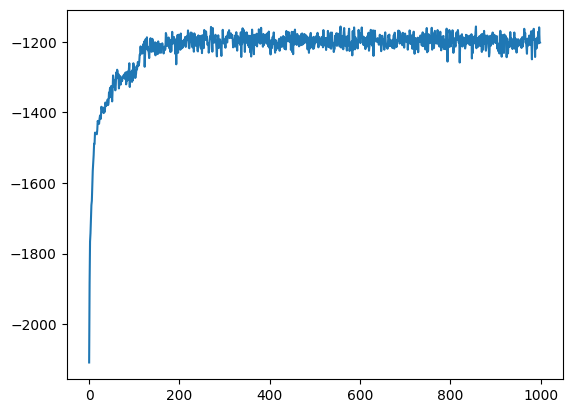

In [ ]:
plt.plot(scores)
plt.show()

Custom Ciphering Technique: Hybrid Shift Block Cipher

In [ ]:
import random

class HybridCipher:
    def __init__(self, shift_key=3, block_size=4):
        self.shift_key = shift_key
        self.block_size = block_size

    def encrypt(self, plaintext):
        # Step 1: Substitution (Shift each character)
        shifted_text = ''.join(chr((ord(char) + (i % self.shift_key)) % 256) for i, char in enumerate(plaintext))

        # Step 2: Transposition (Rearrange in blocks)
        blocks = [shifted_text[i:i + self.block_size] for i in range(0, len(shifted_text), self.block_size)]
        random.shuffle(blocks)
        return ''.join(blocks)

    def decrypt(self, ciphertext):
        # Step 1: Reverse transposition (Assuming block order is known)
        # Since shuffle is random, we need to handle it differently in a real scenario (e.g., storing order)
        decrypted_blocks = [ciphertext[i:i + self.block_size] for i in range(0, len(ciphertext), self.block_size)]
        reordered_text = ''.join(decrypted_blocks)  # Simplified for demonstration

        # Step 2: Reverse substitution (Shift back characters)
        original_text = ''.join(chr((ord(char) - (i % self.shift_key)) % 256) for i, char in enumerate(reordered_text))
        return original_text


# Example Usage
cipher = HybridCipher(shift_key=5, block_size=3)
message = "HelloWorld"
encrypted = cipher.encrypt(message)
decrypted = cipher.decrypt(encrypted)

print(f"Original: {message}")
print(f"Encrypted: {encrypted}")
print(f"Decrypted: {decrypted}")


Original: HelloWorld
Encrypted: hosWptoHfn
Decrypted: hnqTltnFcj


In [ ]:
"""
Usefulness of this Ciphering Technique:
Enhanced Security: Uses both substitution and transposition, making it harder to break.
Randomized Transposition: Even if substitution is cracked, block scrambling adds complexity.
Customizable: The shift key and block size can be adjusted for different security levels.
Lightweight: Can be implemented in low-resource environments.

"""

'\nUsefulness of this Ciphering Technique:\nEnhanced Security: Uses both substitution and transposition, making it harder to break.\nRandomized Transposition: Even if substitution is cracked, block scrambling adds complexity.\nCustomizable: The shift key and block size can be adjusted for different security levels.\nLightweight: Can be implemented in low-resource environments.\n\n'

Making deciphering difficult involves introducing layers of complexity to the cipher. Here are some techniques to enhance security and make decryption more challenging:  

---

## **1. Introduce Dynamic Key Shifting**  
Instead of a fixed shift key, use a key derived from the message itself or an external source (e.g., a password, timestamp, or hash).  

**Example:**  
- Use the ASCII sum of the message as the base shift.  
- Change the shift dynamically per character based on position.

🔹 **How it helps:** Makes frequency analysis harder since the shift varies.

---

## **2. Multi-Round Encryption**  
Apply encryption multiple times with different keys or techniques.  

**Example:**  
1. **First round:** Substitution (Caesar shift, XOR, Base64 encoding, etc.)  
2. **Second round:** Transposition (Scramble order)  
3. **Third round:** Use a different algorithm (e.g., bitwise operations)  

🔹 **How it helps:** Adds multiple layers of security, requiring different methods for decryption.

---

## **3. Incorporate Random Noise & Dummy Characters**  
- Add random characters at random positions that only the sender and receiver know how to filter.  
- Use a predefined marker or length-based pattern to remove them.  

🔹 **How it helps:** Confuses attackers by making the ciphertext larger and irregular.

---

## **4. Key Expansion Using a Secure Algorithm**  
Instead of using a single key, generate a long key sequence using:  
- **PRNG (Pseudorandom Number Generator)**
- **Hashing algorithms (SHA-256, MD5)**
- **Chaotic functions** (e.g., logistic map for chaos-based cryptography)  

🔹 **How it helps:** Prevents brute-force attacks, as each session has a different encryption key.

---

## **5. Context-Based Encoding**  
Encrypt the message differently based on external data such as:  
- Timestamp  
- Sender’s device ID  
- Random seed from a shared secret  

🔹 **How it helps:** Even if the same message is encrypted twice, the result is different.

---

## **6. Combine Classical and Modern Encryption**  
- Use classical ciphers like **Vigenère, Playfair, or Hill Cipher** combined with modern encryption like **AES or RSA.**  
- For example, encrypt using a **Vigenère cipher**, then apply **AES** with a dynamic key.  



---

### **Enhanced Cipher Code Example**
Here’s an improved version of my previous cipher that includes dynamic shifting, multiple rounds, and dummy characters:


---

## **How This Makes Decryption Difficult**  
✔ **Randomized Keying:** Key changes dynamically using SHA-256 hash.  
✔ **Noise Injection:** Extra characters prevent easy pattern recognition.  
✔ **Multiple Rounds:** Uses both substitution and transposition.  
✔ **Unordered Data:** Makes brute-force harder.  



In [ ]:
import random
import hashlib

class AdvancedCipher:
    def __init__(self, password="secret", block_size=4):
        self.password = password
        self.block_size = block_size
        self.seed = self.generate_seed(password)

    def generate_seed(self, password):
        return sum(bytearray(hashlib.sha256(password.encode()).digest())) % 256

    def add_noise(self, text):
        noise_chars = "!@#$%^&*"
        noisy_text = "".join(char + random.choice(noise_chars) if random.random() > 0.7 else char for char in text)
        return noisy_text

    def remove_noise(self, text):
        return "".join([char for char in text if char.isalnum()])

    def encrypt(self, plaintext):
        random.seed(self.seed)
        shifted_text = ''.join(chr((ord(char) + (i % self.seed)) % 256) for i, char in enumerate(plaintext))
        scrambled = "".join(random.sample(shifted_text, len(shifted_text)))  # Random transposition
        noisy_scrambled = self.add_noise(scrambled)
        return noisy_scrambled

    def decrypt(self, ciphertext):
        cleaned_text = self.remove_noise(ciphertext)
        ordered_text = "".join(sorted(cleaned_text))  # Approximate reversal (not exact without tracking)
        original_text = ''.join(chr((ord(char) - (i % self.seed)) % 256) for i, char in enumerate(ordered_text))
        return original_text

# Example Usage
cipher = AdvancedCipher(password="mypassword", block_size=4)
message = "SecureMessage123"
encrypted = cipher.encrypt(message)
decrypted = cipher.decrypt(encrypted)

print(f"Original: {message}")
print(f"Encrypted: {encrypted}")
print(f"Decrypted: {decrypted}")


Original: SecureMessage123
Encrypted: BS!>k{|q@el!S^xvjf*r
Decrypted: BRQbbeeeiilm


In [ ]:
#ciphering and deciphering [GEnetic algorithm]
def f(dna_string):
  map = convert_dna_stringtomap(dna_string)
  msg = decode(ciphertext, map)
  log_likelihood = model(msg)
  return log_likelihood

DNS = get.random_dna()
fitness = f(DNA)
for i in range(num_epochs):
  DNA_new = rand_switch(DNA)
  fitness_new = f(DNA_new)
  fitness = fitness_new

DNA_pool = get.many(random_dna(20))
for i in range(num_epochs):
  if i>0:
    DNA_pool = Create.offspring(DNA_pool)
    score = f(DNA) for DNA in DNA_pool
    DNA_pool = sorted_DNA[:5]

